In [33]:
#https://www.askpython.com/python/examples/sudoku-solver-in-python
M = 9
def puzzle_solver(a):
    for i in range(M):
        for j in range(M):
            print(a[i][j],end = " ")
        print()
def solve(grid, row, col, num):
    for x in range(9):
        if grid[row][x] == num:
            return False
             
    for x in range(9):
        if grid[x][col] == num:
            return False
 
 
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True
 
def Suduko(grid, row, col):
 
    if (row == M - 1 and col == M):
        return True
    if col == M:
        row += 1
        col = 0
    if grid[row][col] > 0:
        return Suduko(grid, row, col + 1)
    for num in range(1, M + 1, 1): 
     
        if solve(grid, row, col, num):
         
            grid[row][col] = num
            if Suduko(grid, row, col + 1):
                return True
        grid[row][col] = 0
    return False

In [28]:
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from random import sample

base  = 3
side  = base*base
def pattern(row,col): return (base*(row%base)+row//base+col)%side
def shuffle(s): return sample(s,len(s)) 
rBase = range(base) 
rows  = [ g*base + row for g in shuffle(rBase) for row in shuffle(rBase) ] 
cols  = [ g*base + col for g in shuffle(rBase) for col in shuffle(rBase) ]
nums  = shuffle(range(1,base*base+1))
board = [ [nums[pattern(row,col)] for col in cols] for row in rows ]

squares = side*side
empties = squares * 64//81
for p in sample(range(squares),empties):
    board[p//side][p%side] = 0
unsolved_board = copy.deepcopy(board)
numSize = len(str(side))
for line in board:
    print(*(f"{n or '_':{numSize}} " for n in line))
if (Suduko(board, 0, 0)):
    puzzle_solver(board)
else:
    print("Solution does not exist:(")

[[1, 0, 0, 0, 7, 0, 2, 0, 0], [9, 0, 0, 3, 0, 5, 0, 0, 7], [0, 0, 0, 6, 0, 0, 0, 3, 0], [3, 0, 0, 0, 0, 7, 9, 4, 0], [0, 0, 0, 0, 0, 0, 7, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 7, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]
1  _  _  _  7  _  2  _  _ 
9  _  _  3  _  5  _  _  7 
_  _  _  6  _  _  _  3  _ 
3  _  _  _  _  7  9  4  _ 
_  _  _  _  _  _  7  _  _ 
_  _  _  _  _  _  1  _  _ 
_  _  _  _  _  _  _  _  _ 
_  _  _  _  _  _  _  7  _ 
_  _  _  _  4  _  _  _  _ 
1 3 4 8 7 9 2 5 6 
9 6 8 3 2 5 4 1 7 
2 5 7 6 1 4 8 3 9 
3 1 2 5 6 7 9 4 8 
4 8 5 1 9 2 7 6 3 
6 7 9 4 3 8 1 2 5 
5 2 1 7 8 3 6 9 4 
8 4 6 9 5 1 3 7 2 
7 9 3 2 4 6 5 8 1 
[[1, 0, 0, 0, 7, 0, 2, 0, 0], [9, 0, 0, 3, 0, 5, 0, 0, 7], [0, 0, 0, 6, 0, 0, 0, 3, 0], [3, 0, 0, 0, 0, 7, 9, 4, 0], [0, 0, 0, 0, 0, 0, 7, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 7, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]


In [31]:
#https://networkx.org/nx-guides/content/generators/sudoku.html
def dispay(board):
  puzzle = np.asarray(board)
  n = 3
  G = nx.sudoku_graph(n)
  mapping = dict(zip(G.nodes(), puzzle.flatten()))
  pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

  # we map the nodes 1-9 to a colormap
  low, *_, high = sorted(mapping.values())
  norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
  mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

  plt.figure(figsize=(12, 12))
  nx.draw(
      G,
      labels=mapping,
      pos=pos,
      with_labels=True,
      node_color=[mapper.to_rgba(i) for i in mapping.values()],
      width=1,
      node_size=1000,
  )
  plt.show()

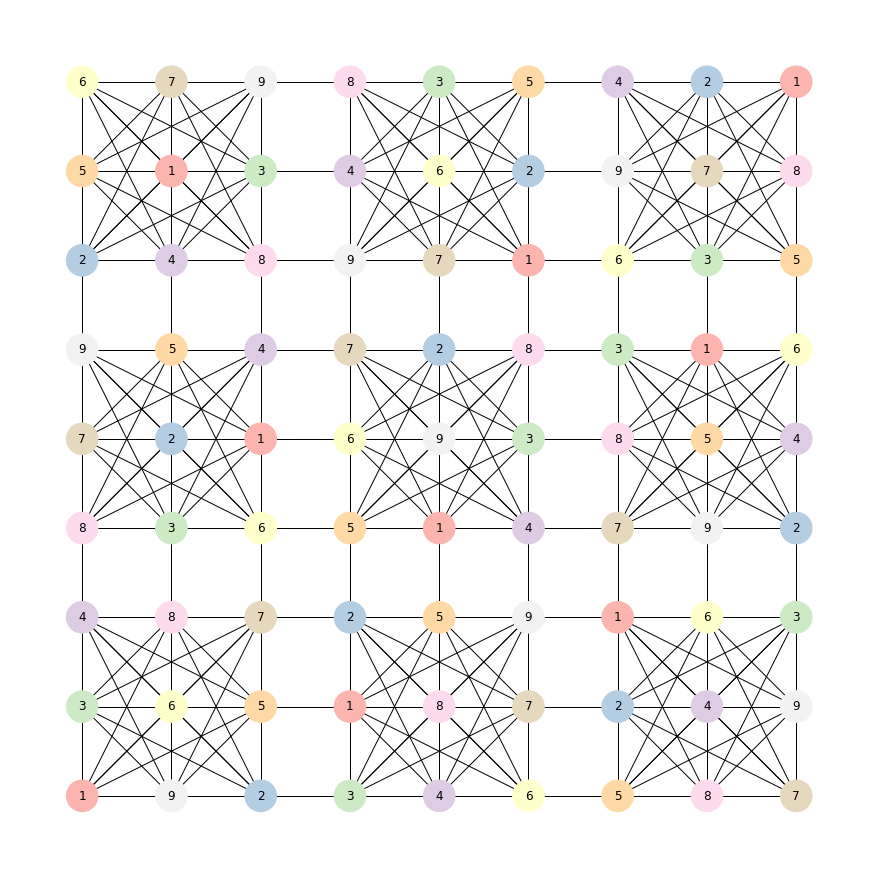

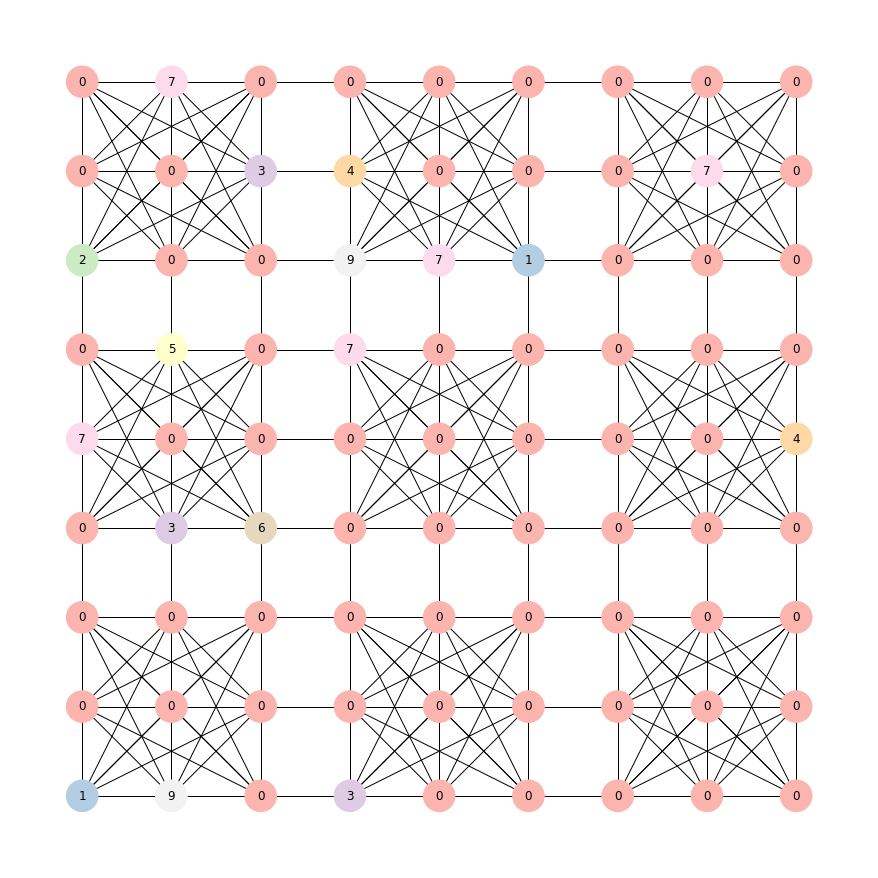

In [32]:
dispay(board)
dispay(unsolved_board)